In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("../datasets/framingham.csv")

X = df["cigsPerDay"].dropna().to_numpy()
y = df["TenYearCHD"].loc[df[["cigsPerDay"]].dropna().index].to_numpy()

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


/var/folders/4y/3l045nhs31vcj3w06w12wxnm0000gn/T/ipykernel_16892/3578424543.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


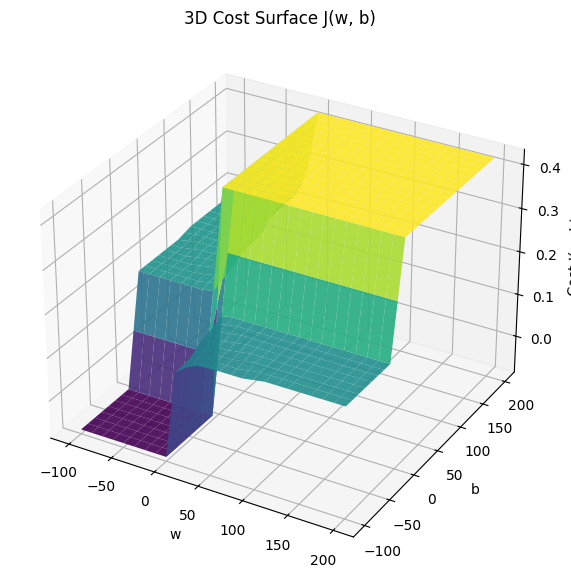

In [47]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function with b=0 for simplicity.
def linear_cost(X, y, w, b=0):
    m = len(X)
    total_cost = 0
    for i in range(m):
        cost = sigmoid(w * X[i] + b) - y[i]   
        total_cost += cost
    return total_cost / (2 * m)

# Create points 
w_values = np.linspace(-100, 200, 25)
b_values = np.linspace(-100, 200, 25)
W, B  = np.meshgrid(w_values, b_values)

Z = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i,j] = linear_cost(X,y,W[i,j],B[i,j])

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap="viridis", edgecolor="none", alpha=0.9)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Cost J(w, b)")
ax.set_title("3D Cost Surface J(w, b)")
plt.show()

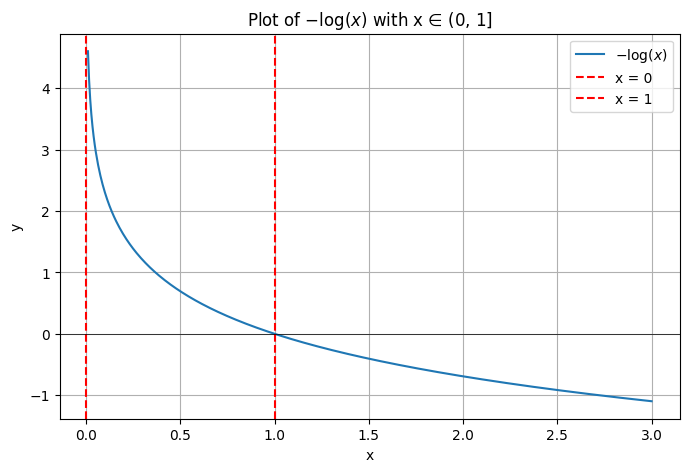

In [52]:
# x > 0 because log(x) is undefined at x <= 0
x = np.linspace(0.01, 3, 500)
y = -np.log(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$- \log(x)$")

plt.axvline(x=0, color='red', linestyle='--', label="x = 0")
plt.axvline(x=1, color='red', linestyle='--', label="x = 1")

plt.axhline(y=0, color='black', linewidth=0.5)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of $-\\log(x)$ with x ∈ (0, 1]")
plt.grid(True)
plt.legend()
plt.show()